In [7]:
## https://www.youtube.com/watch?v=kSqxn6zGE0c

In [8]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

In [9]:
path = 'G:/Shared drives/TriplegangersFemaleData/neutrals/Age18-AlexiaHatta/processed/models/*.png'
path = 'G:/Shared drives/TriplegangersFemaleData/neutrals/Age18-AlexiaHatta/processed/models/*_noHaircap.png'
path = 'G:/Shared drives/TriplegangersFemaleData/neutrals/Age18-*/processed/models/*_noHaircap.png'


# path = 'H:/Shared drives/TriplegangersFemaleData/neutrals/*/processed/models/*_noHaircap.png'
processed_noHaircap = glob(path)

In [10]:
img_mpl = plt.imread(processed_noHaircap[20])
img_cv2 = cv2.imread(processed_noHaircap[20])

In [11]:
img_mpl.shape, img_cv2.shape

((8192, 8192, 3), (8192, 8192, 3))

In [12]:
img_mpl

array([[[0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        ...,
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353]],

       [[0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        ...,
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353]],

       [[0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        ...,
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353],
        [0.7764706 , 0.58431375, 0.45882353]],

       ...,

       [[0.6509804 , 0.5019608 , 0.3764706 ],
        [0.6509804 , 0.5019608 , 0.3764706 ],
        [0.6509804 , 0

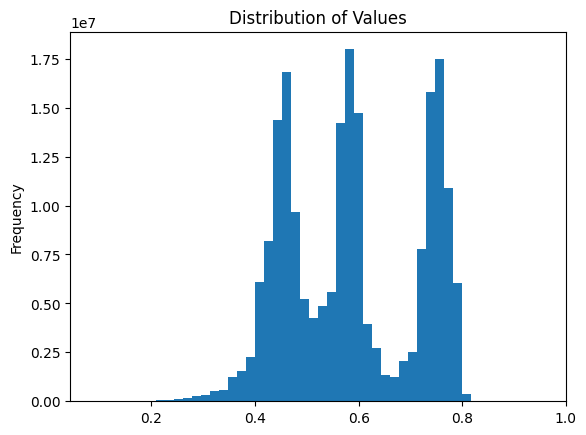

In [13]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
    bins=50,
    title='Distribution of Values')
plt.show()

DISPLAY IMAGES

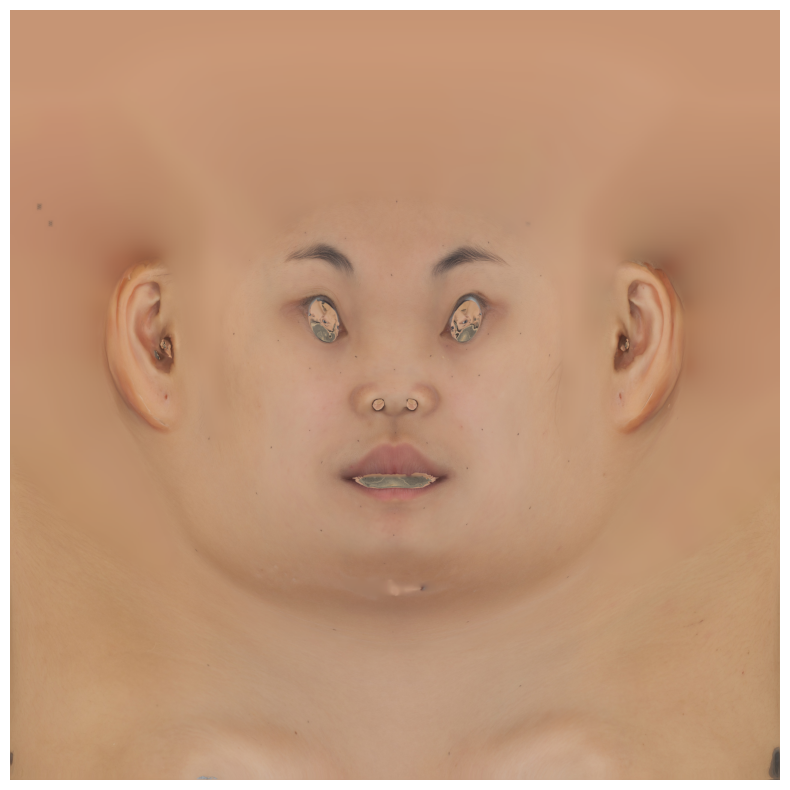

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

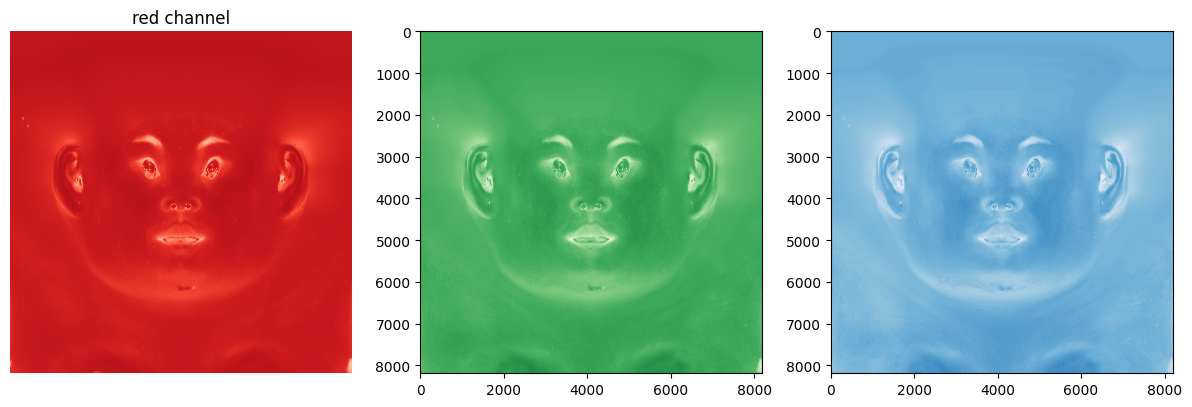

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[0].set_title('red channel')
plt.show()

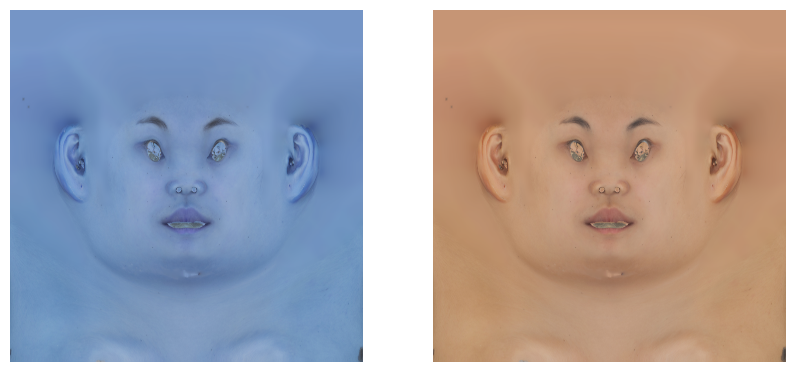

In [16]:
#converting from bgr to rgb
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_cv2)
ax[0].axis('off')
ax[1].imshow(img_cv2_rgb)
ax[1].axis('off')
plt.show()

IMAGE MANIPULATION

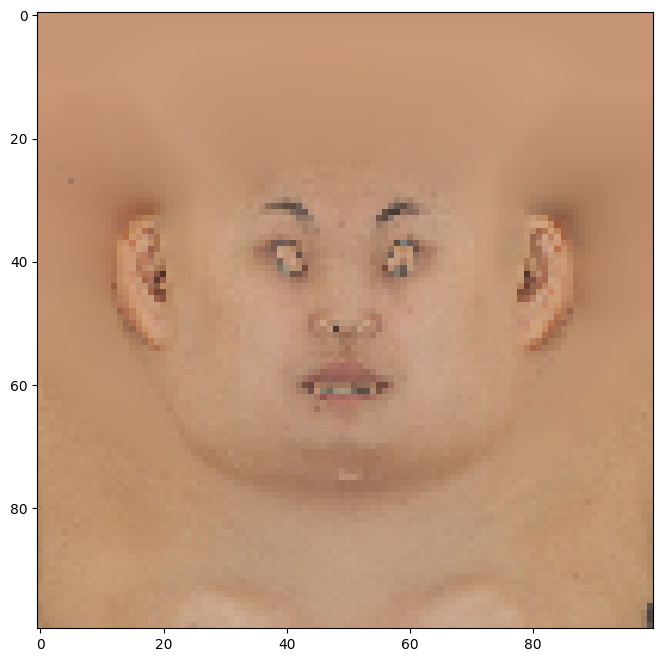

(100, 100, 3)

In [17]:
scale = 0.01
resolution = 100
img_resized = cv2.resize(img_cv2_rgb, None, fx=scale, fy=scale)
img_resized = cv2.resize(img_cv2_rgb, (resolution, resolution))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
# ax.axis('off')
plt.show()
img_resized.shape

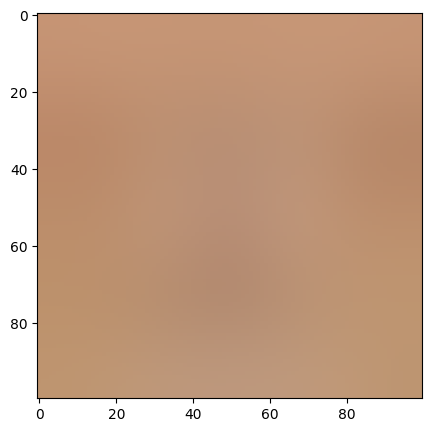

In [51]:
# blurring
blur_amt = 50
img_blur = cv2.GaussianBlur(img_resized, (501, 501), 11)
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_blur)
# plt.show()

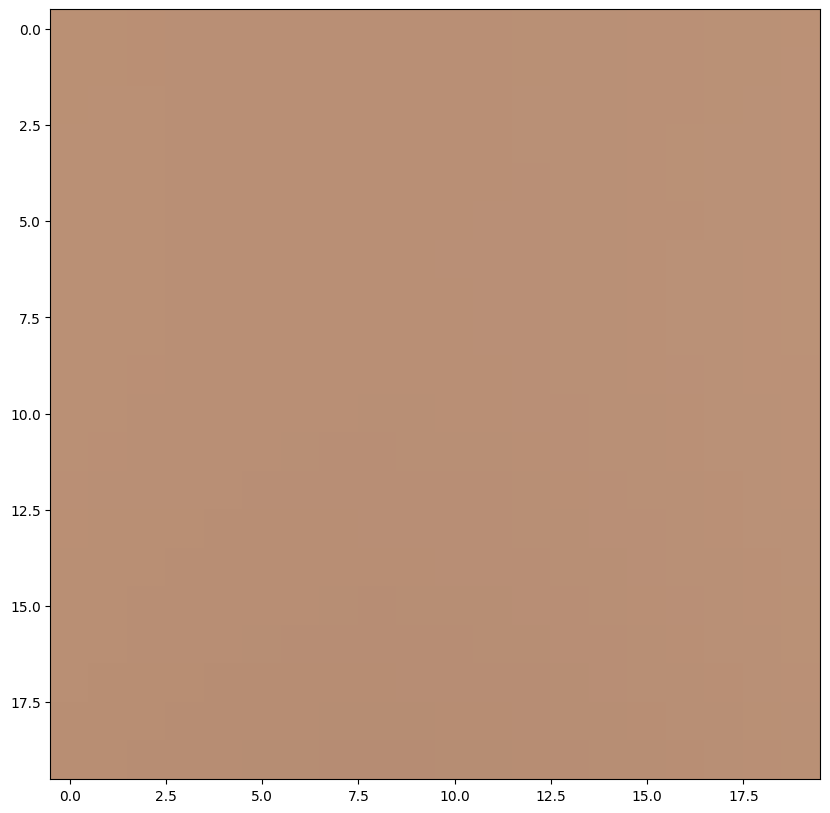

In [67]:
def center_crop(img, dim):
    width, height = img.shape[1], img.shape[0]
    crop_width = dim[0] if dim[0] < img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1] < img.shape[0] else img.shape[0]
    mid_x, mid_y = int(width/2), int(height/2)
    cw2, ch2 = int(crop_width/2), int(crop_height/2)
    crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
    return crop_img

fig, ax = plt.subplots(figsize=(10,10))
img_cropped = center_crop(img_blur, (20, 20))
ax.imshow(img_cropped)

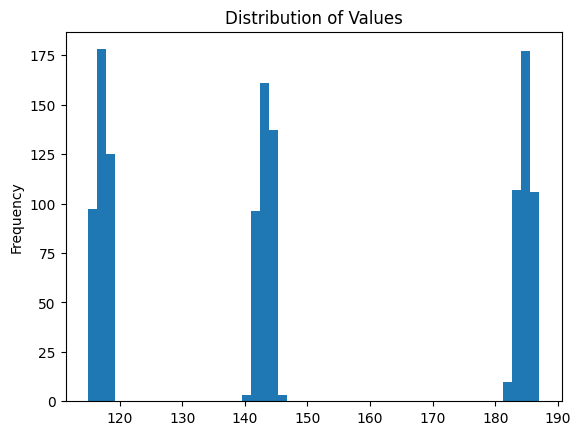

In [62]:
pd.Series(img_cropped.flatten()).plot(kind='hist',
    bins=50,
    title='Distribution of Values')
plt.show()

In [104]:
# print(np.mean(img_cropped, axis=(0,1,2)))
tuple(range(0, img_cropped.ndim-1))
img_cropped.ndim
np.mean(img_cropped, axis=tuple(range(0, img_cropped.ndim-1))), np.mean(img_cv2, axis=tuple(range(0, img_cropped.ndim-1)))

np.mean(cv2.imread(processed_noHaircap[1]), axis=tuple(range(0, img_cropped.ndim-1)))




array([111.66535366, 141.9913296 , 189.30761333])

: 